In [1]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from model_utils import *
from run_grid_search import load_json
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={"figure.figsize": (20, 10)})

In [2]:
alias = {"ada_boost": "ensamble1"}

In [3]:
selected_features = load_json("selected_features.json")
model = "ensamble3"
features = selected_features[model]

In [4]:
def plot_regression(data_df: pd.DataFrame, model: str) -> None:
    model = alias[model] if model in alias.keys() else model

    y_real = data_df["rejeicao"].values
    pred = data_df["predicao"].values

    cor = data_df[["rejeicao", "predicao"]].corr()["rejeicao"]["predicao"]

    plot = data_df.plot.scatter(x="rejeicao", y="predicao", c="red", s=100, title=model)
    x_min, x_max = data_df["rejeicao"].min(), data_df["rejeicao"].max()
    y_min, y_max = data_df["predicao"].min(), data_df["predicao"].max()
    range_ = [min(x_min, y_min), max(x_max, y_max)]
    plt.plot(range_, range_) 
    plot.text( max(x_max, y_max) -  max(x_max, y_max)/10, 0, f"c = {np.round(cor, 3)}", fontsize=25, bbox={"boxstyle": 'square', "facecolor": 'white', "alpha": 1, "pad":0.2})

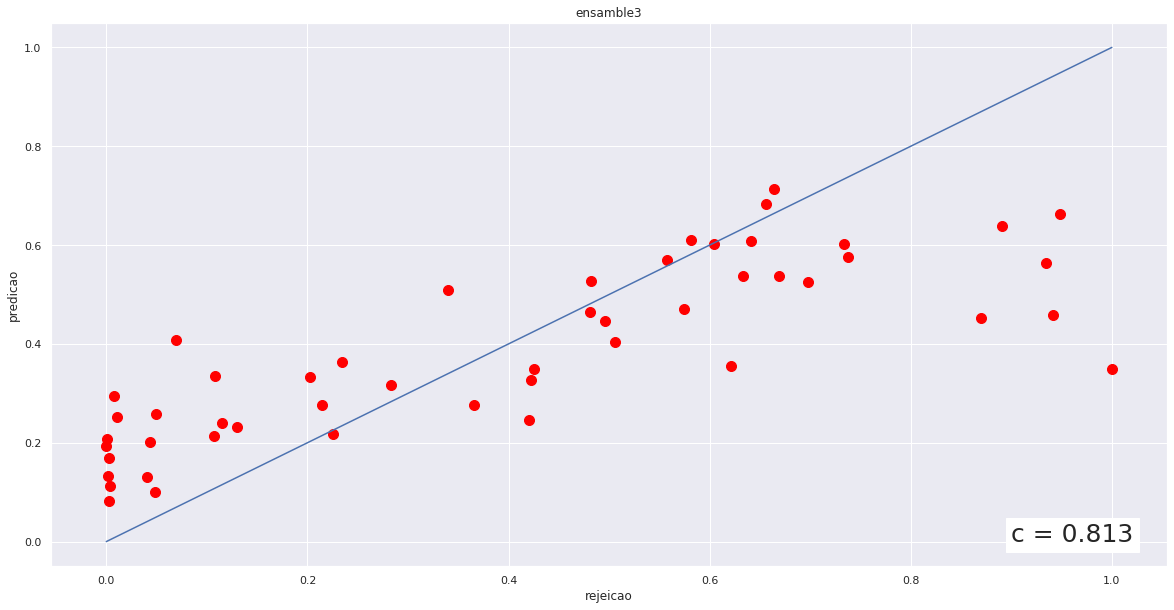

In [5]:
params = PARAMETERS[model]
regressor = MODELS[model]
normalize = NORMALIZE[model]
data_df = get_data(features, normalize=normalize)
x, y = data_df.drop(columns=["paredao", "nome", "rejeicao"], axis=1).to_numpy(), data_df.drop(columns=data_df.columns[:-1], axis=1).to_numpy()
y = np.ravel(y)
reg = regressor(**params)
preds = cross_val_predict(reg, x, y, cv=10, n_jobs=5)
data_df["predicao"] = preds
data_df["erro_absoluto"] = abs(data_df["rejeicao"] - data_df["predicao"])
plot_regression(data_df, model)
    

# Métricas

In [6]:
y_real = data_df["rejeicao"].values
pred = data_df["predicao"].values
for metric in METRICS.keys():
    print("{}: {}".format(metric, METRICS[metric](y_real, pred)))

mse: 0.04003666623187268
mae: 0.1535131211667252
r2: 0.590954513521192
